In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

font_location = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = matplotlib.font_manager.FontProperties(fname = font_location).get_name()
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rc('font',family= font_name)

In [64]:
df = pd.read_pickle("/home/pirl/Downloads/poooos.pkl") 
df.head()

,모름,KF규격,CUSTOMER NAME,Calendar Day일 2,POS Category Code,UPC,품목명,Sales (Bag),Sales SU,박스입수,...,구군,시점,인구,선행종합지수(2015=100),동행종합지수(2015=100),후행종합지수(2015=100),분기,gdp,연령,평균소득
0,CNX,0,(주)지에스리테일 본부,2017-01-01,MP,8.800000e+12,CNX 황사마스크 대형1P,27,27.0,50,...,평택시,2017-01,472141,106.8,105.7,105.1,2017Q1,384682.7,39.2,1281433
1,UKM,0,(주)지에스리테일 본부,2017-01-01,MG,8.800000e+12,UKM 크리넥스 입체마스크 성인용 3P 6G x 3EA,28,0.0,50,...,평택시,2017-01,472141,106.8,105.7,105.1,2017Q1,384682.7,39.2,1281433
2,UKM,0,(주)지에스리테일 본부,2017-01-01,MG,8.800000e+12,UKM 크리넥스 입체마스크 어린이용 3P 6Gx3EA,20,0.0,50,...,평택시,2017-01,472141,106.8,105.7,105.1,2017Q1,384682.7,39.2,1281433
3,CNX,0,(주)지에스리테일 본부,2017-01-01,MG,8.800000e+12,CNX 황사마스크 성인용3P,1,1.0,50,...,포천시,2017-01,154381,106.8,105.7,105.1,2017Q1,384682.7,43.4,1290713
4,CNX,KF94,(주)지에스리테일 본부,2017-01-01,MP,8.800000e+12,CNX KF94 방역용 마스크 1입,2,2.0,50,...,포천시,2017-01,154381,106.8,105.7,105.1,2017Q1,384682.7,43.4,1290713


In [65]:
df.columns

Index(['모름', 'KF규격', 'CUSTOMER NAME', 'Calendar Day일 2', 'POS Category Code',
       'UPC', '품목명', 'Sales (Bag)', 'Sales SU', '박스입수', '구분', '유통사', 'SUB-CTG',
       '수량(CS)', '금액', '가격', '지역', '구군', '시점', '인구', '선행종합지수(2015=100)',
       '동행종합지수(2015=100)', '후행종합지수(2015=100)', '분기', 'gdp', '연령', '평균소득'],
      dtype='object')

In [67]:
df["모름"].value_counts()

CNX       44045
UKM       20210
UK_CNX     2798
MBM         425
NB          212
--           34
Name: 모름, dtype: int64

In [80]:
df["KF규격"].value_counts()

0       53898
KF80     9557
KF94     4269
Name: KF규격, dtype: int64

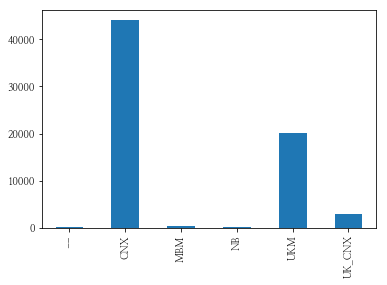

In [70]:
# 공법 Bar Chart
df_count = df["모름"].value_counts()
# sort_index(inplace=True) : 정렬 결과를 저장
df_count.sort_index(inplace=True)
df_count.plot.bar()

In [71]:
import matplotlib.dates as mdates

months = mdates.MonthLocator()

xaxis.set_minor_locator(months)

NameError: name 'xaxis' is not defined

(-500, 600)

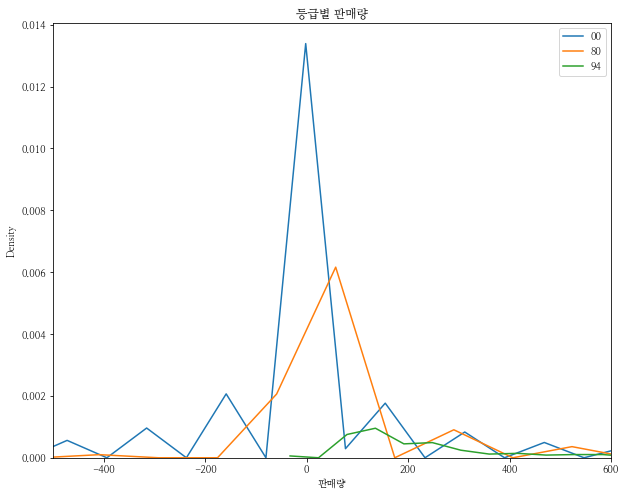

In [88]:
#규격 대비 판매


plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['KF규격'] == '0' , 'Sales (Bag)'], label = '00')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['KF규격'] == 'KF80', 'Sales (Bag)'], label = '80')

sns.kdeplot(df.loc[df['KF규격'] == 'KF94', 'Sales (Bag)'], label = '94')


# Labeling of plot
plt.xlabel('판매량'); plt.ylabel('Density'); plt.title('등급별 판매량');


plt.xlim(-500,600)

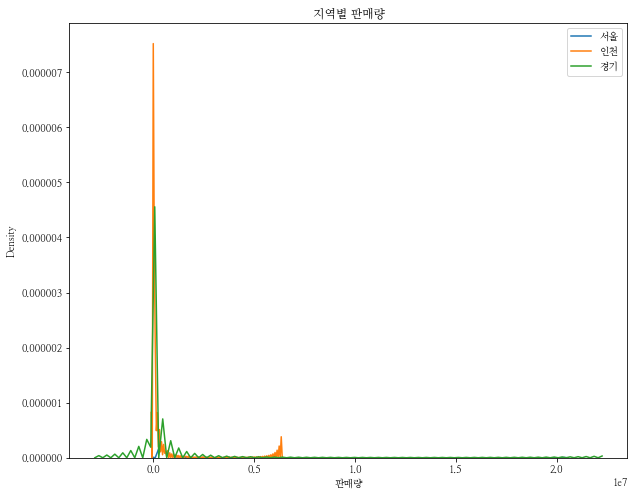

In [98]:
#지역 대비 판매


plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['지역'] == '서울' , '금액'], label = '서울')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['지역'] == '인천', '금액'], label = '인천')

sns.kdeplot(df.loc[df['지역'] == '경기', '금액'], label = '경기')


# Labeling of plot
plt.xlabel('판매량'); plt.ylabel('Density'); plt.title('지역별 판매량');




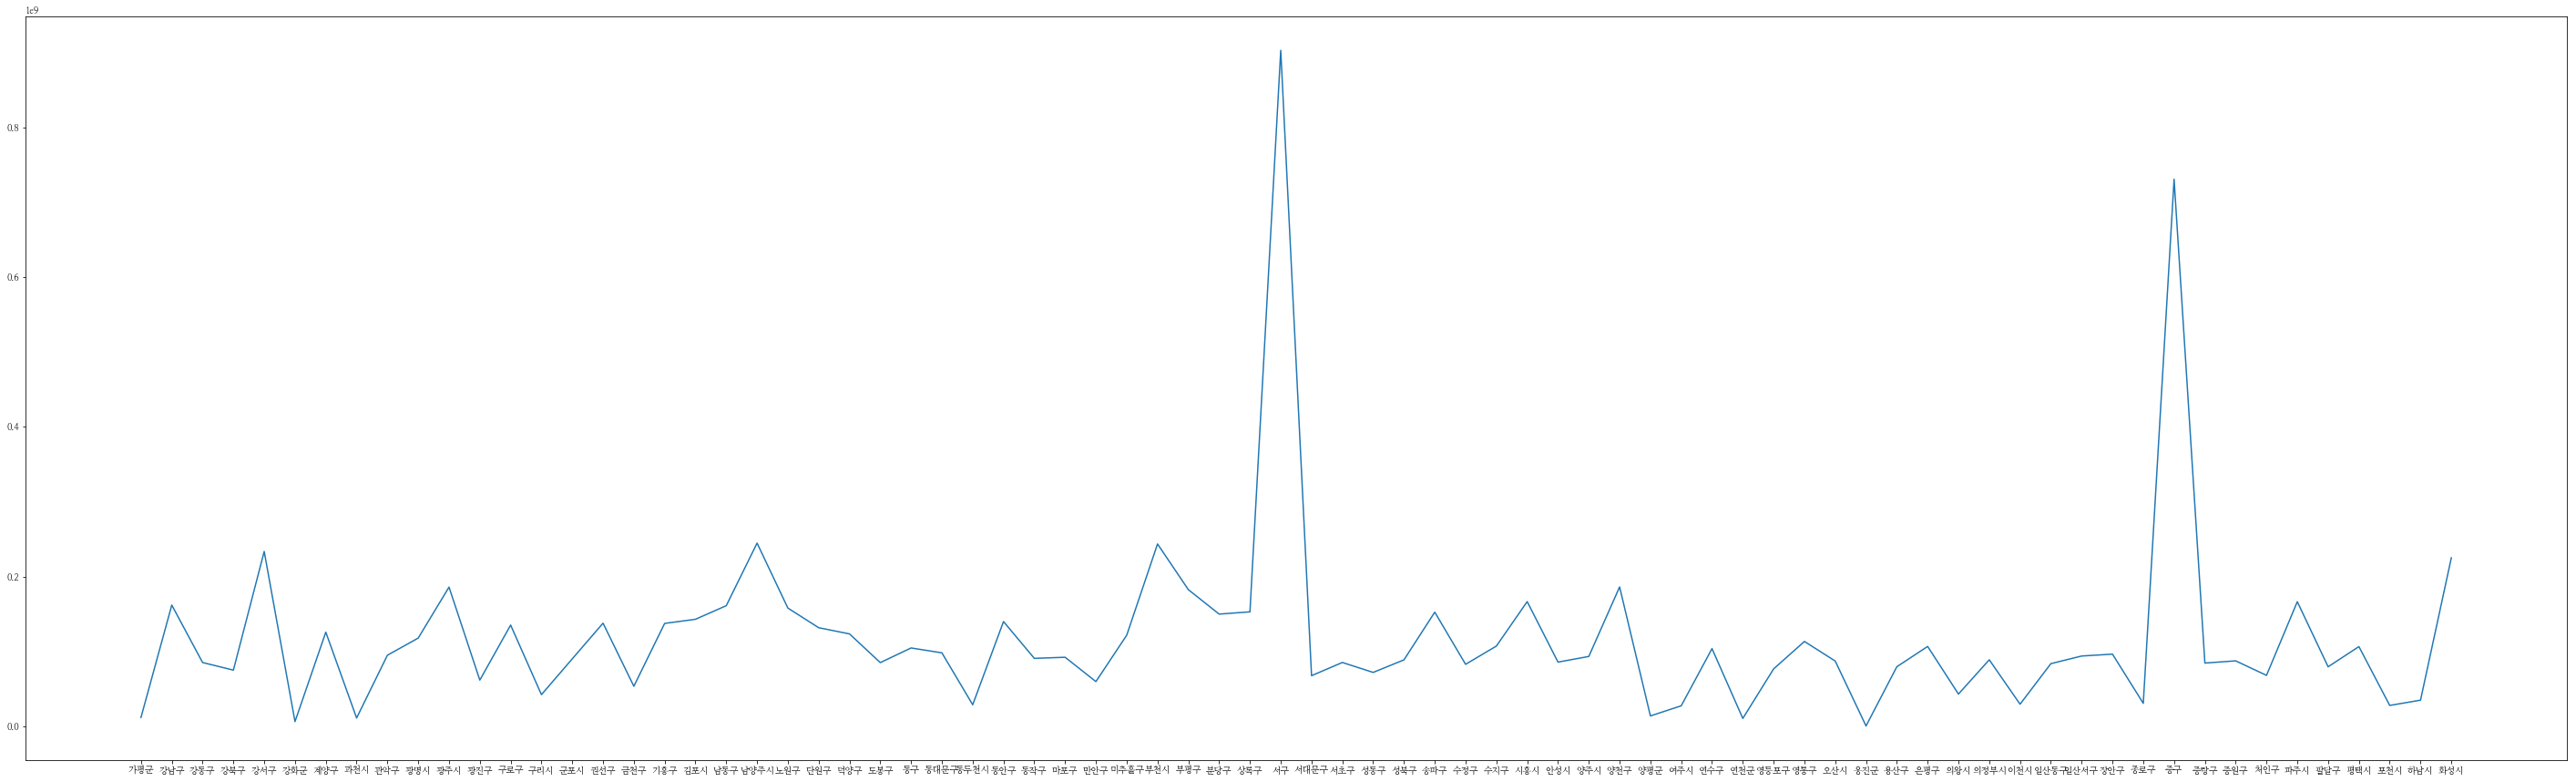

In [104]:
df.groupby('구군')['금액'].sum()

# 공법 Bar Chart
df_count = pd.Series(df.groupby('구군')['금액'].sum())
plt.figure(figsize=(50, 15))
plt.plot(df_count.index, df_count)


In [73]:
df_test["Calendar Day일 2"] = pd.to_datetime(df_test["Calendar Day일 2"])

/home/pirl/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


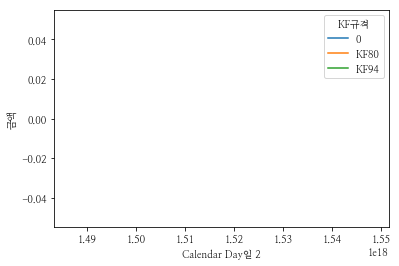

In [74]:
sns.tsplot(data=df_test, time="Calendar Day일 2",condition='KF규격', value="금액")

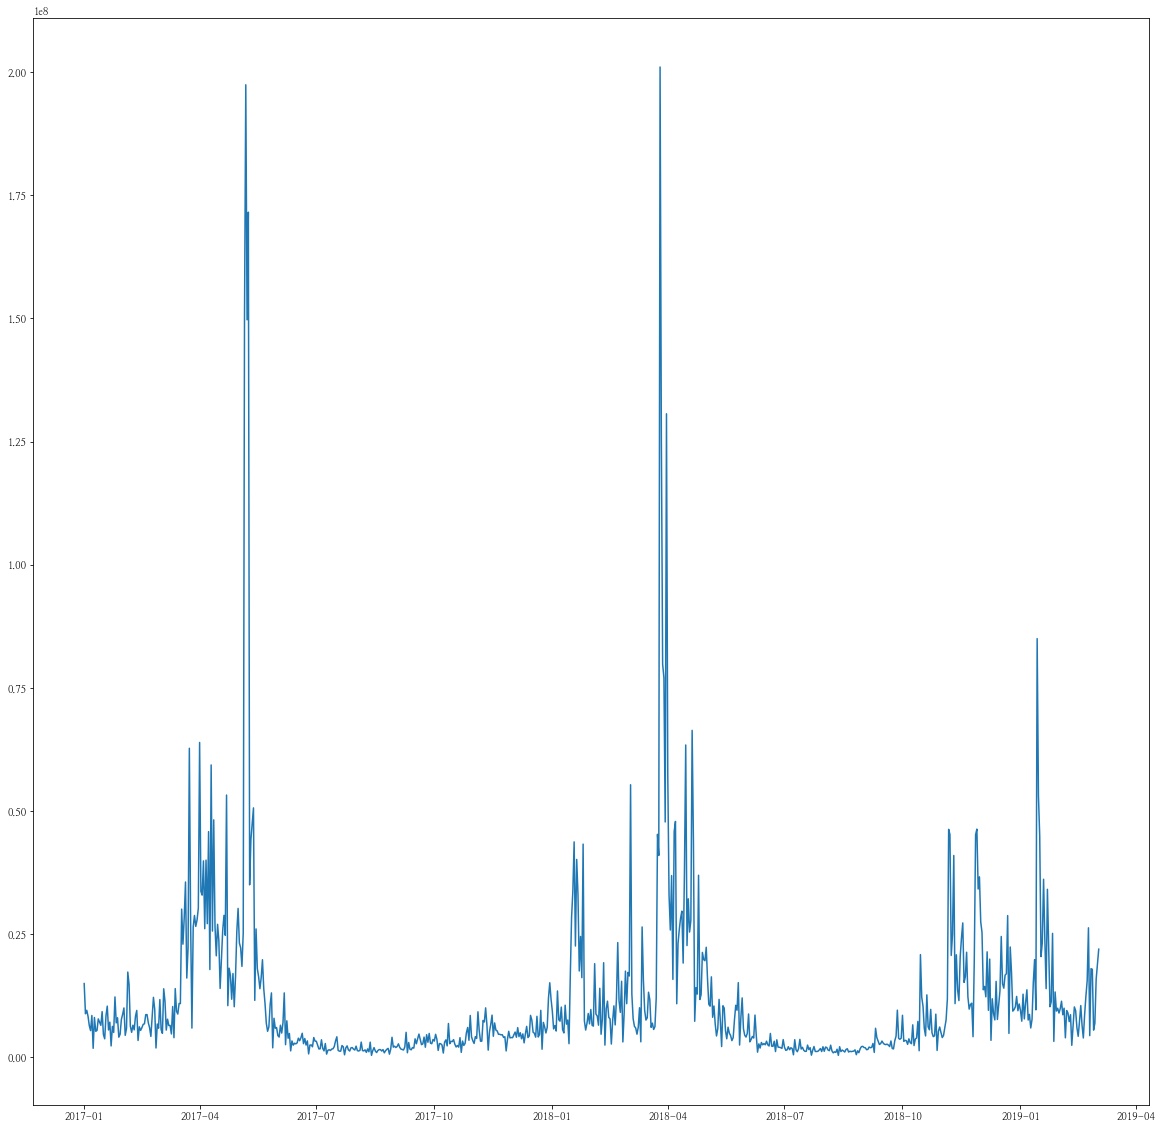

In [49]:
# 공법 Bar Chart
df_count = pd.Series(df.groupby("Calendar Day일 2")["금액"].sum())
plt.figure(figsize=(20, 20))
plt.plot(pd.to_datetime(df_count.index), df_count)


In [51]:
df.groupby("공법")['Sales (Bag)'].sum()

공법
--          37
CNX    2276722
MBM      17953
NB         700
UKM     595850
Name: Sales (Bag), dtype: int64

(-20, 100)

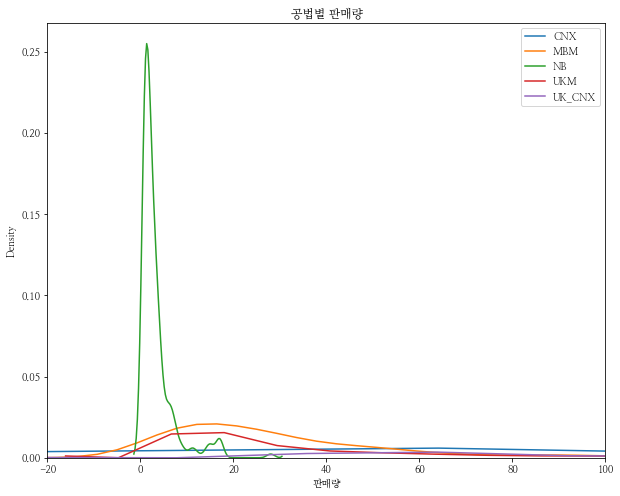

In [78]:
#공법 대비 판매


plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['모름'] == 'CNX' , 'Sales (Bag)'], label = 'CNX')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['모름'] == 'MBM', 'Sales (Bag)'], label = 'MBM')

sns.kdeplot(df.loc[df['모름'] == 'NB', 'Sales (Bag)'], label = 'NB')

sns.kdeplot(df.loc[df['모름'] == 'UKM', 'Sales (Bag)'], label = 'UKM')

sns.kdeplot(df.loc[df['모름'] == 'UK_CNX', 'Sales (Bag)'], label = 'UK_CNX')

# Labeling of plot
plt.xlabel('판매량'); plt.ylabel('Density'); plt.title('공법별 판매량');


plt.xlim(-20,100)

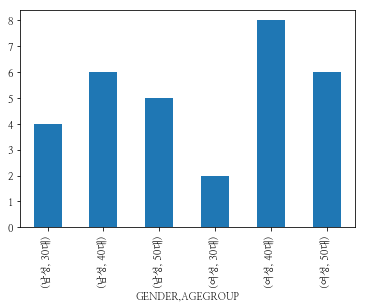

In [11]:
## 성별 + 연령대 Bar Chart
# DataFrame.groupby["변수1", ...].size() : 복수(1개 이상)의 범주형 변수의 자료 수 통합 계산
# groupby(column) : column기준 자료 요약, as_index : groupby 변수의 index로 사용 여부
df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index=False).size()
# df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index=False).agg("count") # 동일함
df_groupby_total.plot.bar()

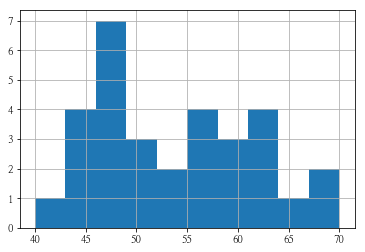

In [15]:
df_fitness["RSTPULSE"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e393d5048>,
      dtype=object)

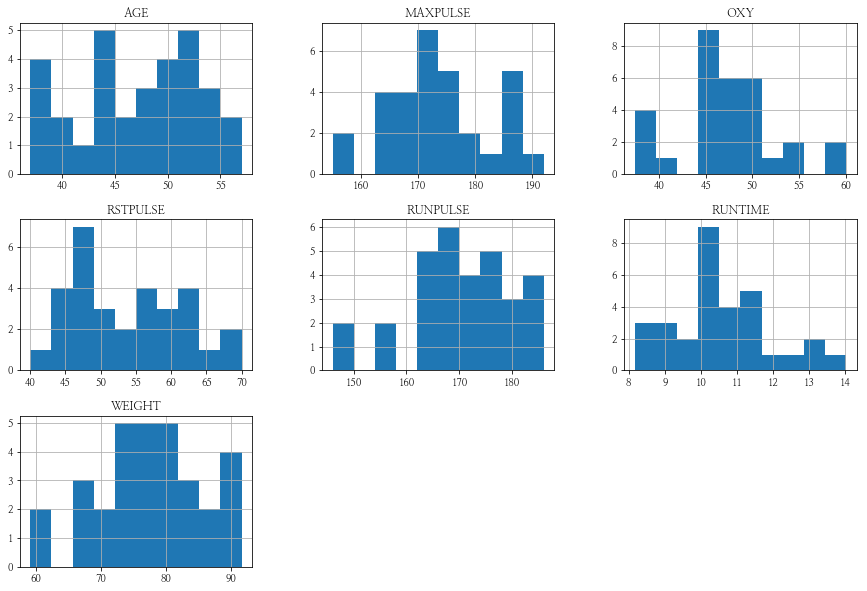

In [18]:
# hist(figsize) : figsize = (x축 크기, y축 크기) - 그래프 영역별 중첩 처리
df_fitness.hist(figsize = (15, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e393d5cc0>,
      dtype=object)

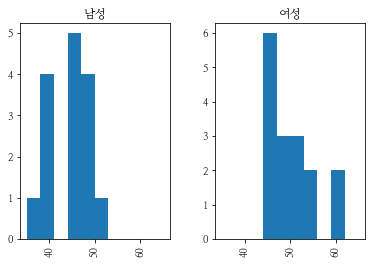

In [20]:
# hist(column = 변수, by = 그룹변수, range = (최소값, 최대값)) - X축 범위 통일
df_fitness.hist(column="OXY", by="GENDER", range=(35, 65))

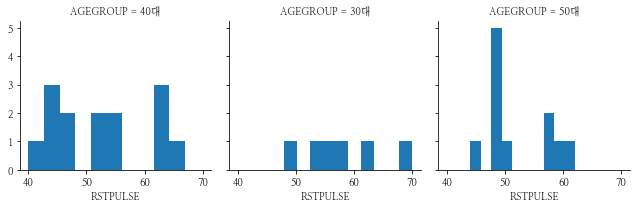

In [25]:
# seaborn 사용. FacetGrid(데이터 지정, col=컬럼 지정) : 지정된 컬럼의 범주별 그리드 영역 생성. Y축 범위 동일
grid = sns.FacetGrid(df_fitness, col="AGEGROUP")
# map(함수, 문자형 컬럼명) : 범주별 히스토그램 생성
grid.map(plt.hist, "RSTPULSE")

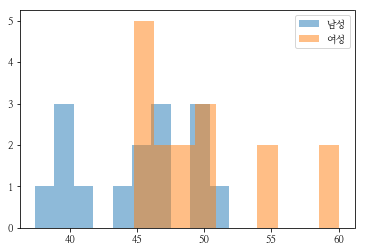

In [30]:
# matplotlib.pyplot.hist method 이용하면 중첩 histogram 생성
# hist(변수, label="표시 값", alpha=투명도(0 ~ 1 지정)
plt.hist(df_fitness[df_fitness["GENDER"] == "남성"]["OXY"], label = "남성", alpha = 0.5)
plt.hist(df_fitness[df_fitness["GENDER"] == "여성"]["OXY"], label = "여성", alpha = 0.5)
plt.legend()

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

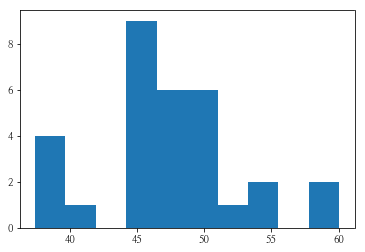

In [31]:
plt.hist(x = "OXY", data = df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

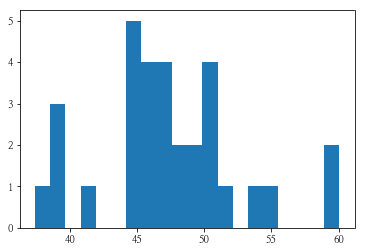

In [33]:
plt.hist(x = "OXY", data = df_fitness, bins = 20)

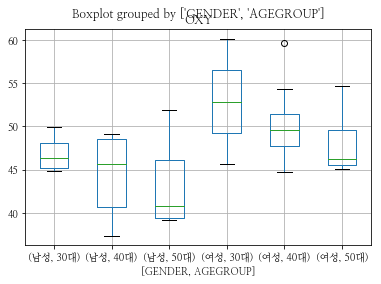

In [38]:
# boxplot(column=변수, by=그룹 변수)
df_fitness.boxplot(column="OXY", by=["GENDER", "AGEGROUP"])

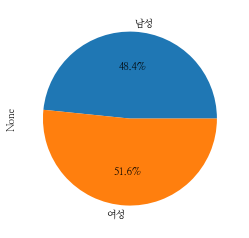

In [41]:
# groupby(column) : column 기준 자료 요약. (size : group별 자료 수)
df_count = df_fitness.groupby(["GENDER"]).size()
# pie(데이터, labels=레이블 변수 지정, autopct=비율 %로 표시(%.1f%% : 소수점 1자리 적용)
df_count.plot.pie(y="OXY", autopct="%.1f%%")

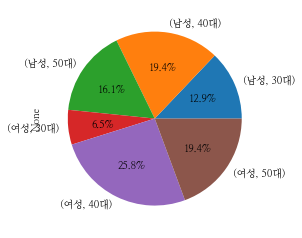

In [44]:
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
df_count.plot.pie(autopct="%.1f%%")

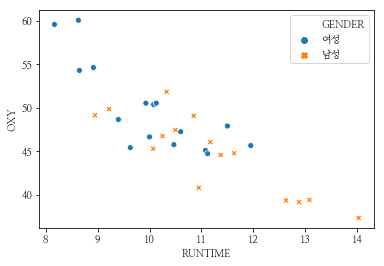

In [49]:
# seaborn.scatterplot method 이용
# scatterplot(x, y, hue: 그룹 변수, style: 그룹별 marker 구분, data)
sns.scatterplot(x="RUNTIME", y="OXY", hue="GENDER", style="GENDER", data=df_fitness)

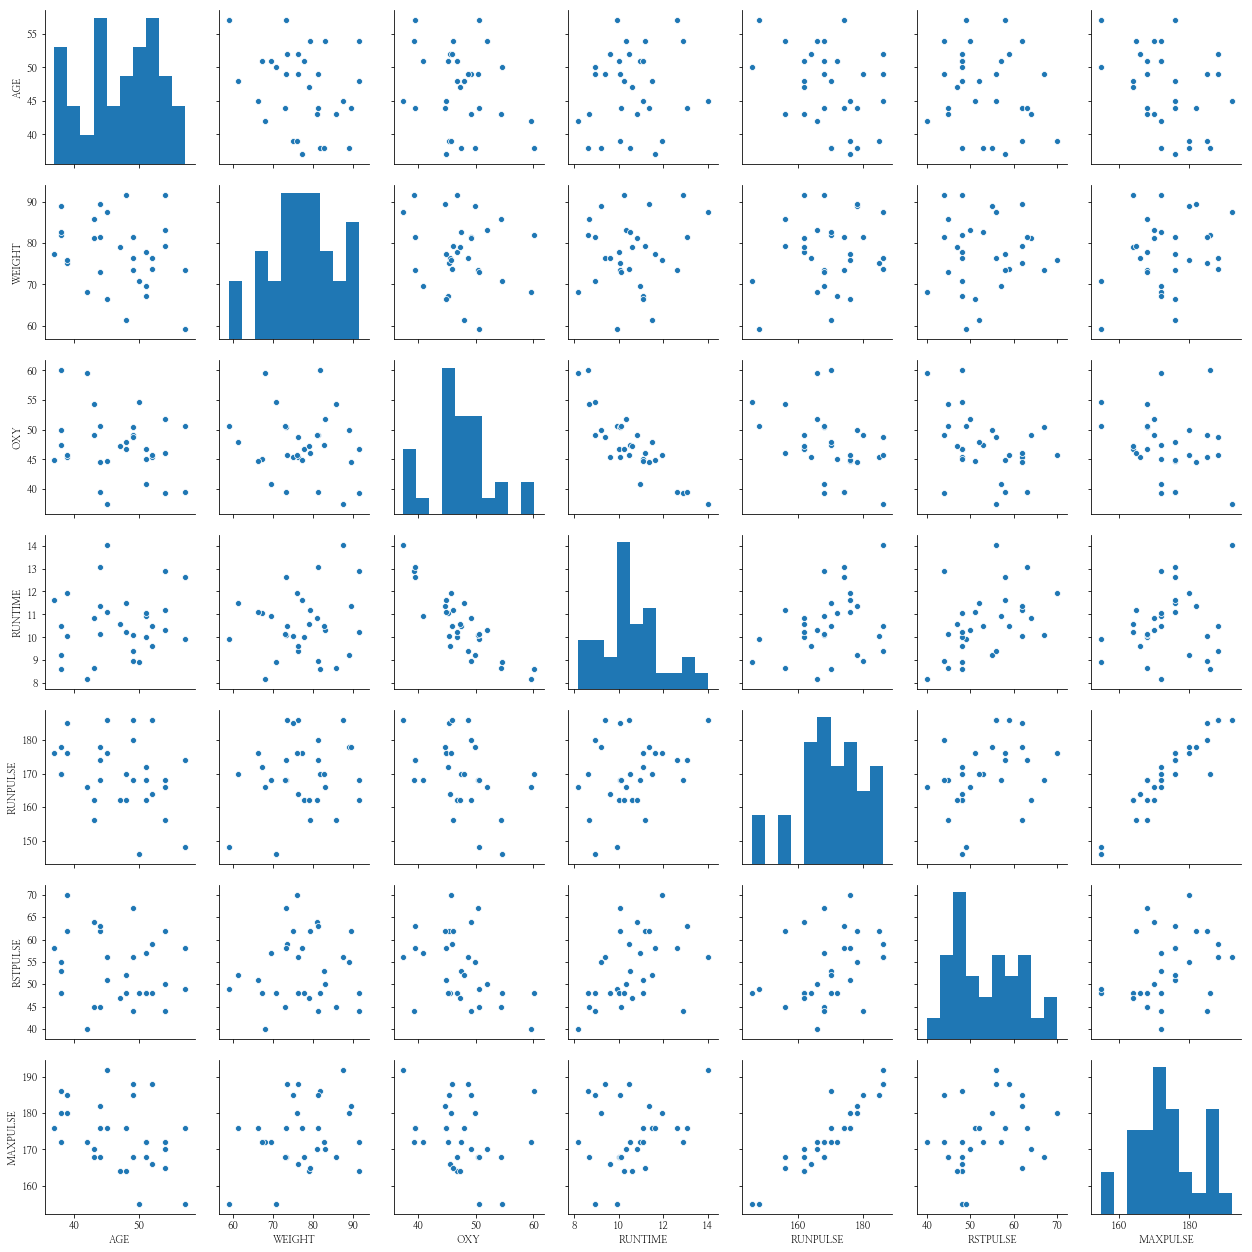

In [50]:
# 전체 변수 간의 관계 Scatter Matrix 생성
# pairplot(데이터) : Scatter Plot 그래프 생성
sns.pairplot(df_fitness)

In [51]:
# Pivot 활용하여 각국 통화 별 데이터 생성
df_currency_pivot = df_currency.pivot(index="APPL_DATE", columns="CURRENCY", values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


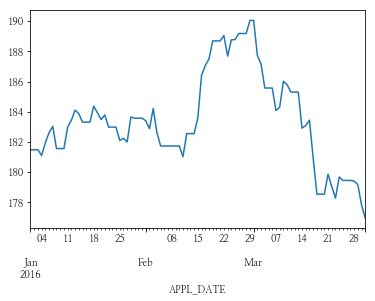

In [52]:
# 중국 위안화 별도 그림(엔화, 달러와 단위 차이)
df_currency_pivot["CNY"].plot()

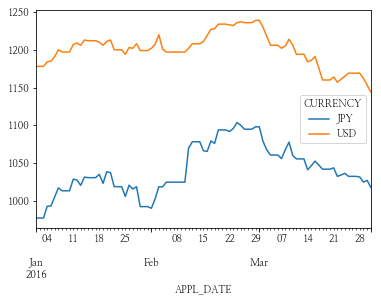

In [53]:
# 일본 엔화, 미국 달러
df_currency_pivot[["JPY", "USD"]].plot()

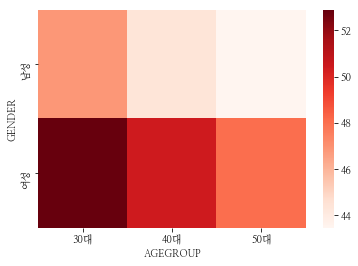

In [60]:
# 성별과 연령대별 혈당 산소 요구량 평균 계산, groupby : (성별, 연령), agg("mean") : 혈당 산소 요구량 평균값
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index=False).agg("mean")
# pivot(성별, 연령대, 혈당 산소 요구량) : x축(연령대), y축(성별), 값(혈당 산소 요구량의 평균)으로 pivot
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
# heatmap(데이터, cmap: 색상)
sns.heatmap(df_pivot, cmap="Reds")

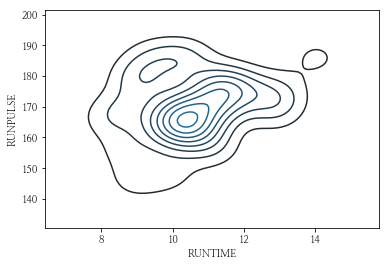

In [63]:
# kdeplot(x축, y축, shade : 음영 선택 여부)
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["RUNPULSE"], shade=False)

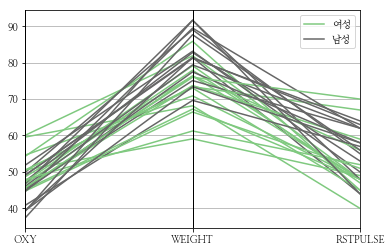

In [64]:
# parallel_coordinates(데이터, 그룹 변수, cols=변수, colormap=다양한 colormap 지정)
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols=["OXY", "WEIGHT", "RSTPULSE"], colormap="Accent")

Text(0.5, 1.0, 'Scatter')

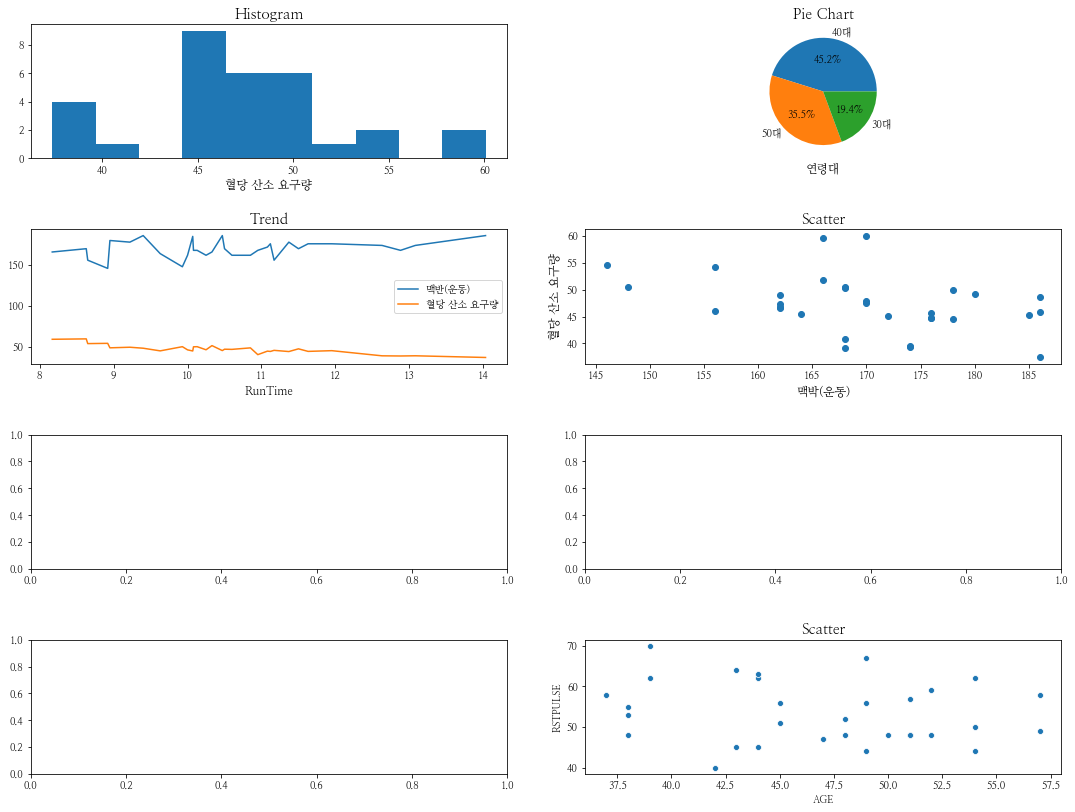

In [79]:
df_count = df_fitness["AGEGROUP"].value_counts() # Pie Chart를 위한 집계 데이터
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 11)) # (2,2) 4분할. 4개의 그래프 생성
plt.tight_layout(w_pad=5, h_pad=5)
# Histogram
axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)
# Pie Chart
axes[0,1].pie(df_count, labels=df_count.index.tolist(), autopct = "%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize=15)
axes[0,1].set_xlabel("연령대", fontsize=12)
# Trend
axes[1,0].plot("RUNTIME", "RUNPULSE", data=df_fitness, label="맥반(운동)")
axes[1,0].plot("RUNTIME", "OXY", data=df_fitness, label="혈당 산소 요구량")
axes[1,0].set_title("Trend", fontsize=15)
axes[1,0].set_xlabel("RunTime", fontsize=12)
axes[1,0].legend()
# Scatter
axes[1,1].scatter("RUNPULSE", "OXY", data=df_fitness)
axes[1,1].set_title("Scatter", fontsize=15)
axes[1,1].set_xlabel("맥박(운동)", fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=12)

sns.scatterplot("AGE", "RSTPULSE", data=df_fitness).set_title("Scatter", fontsize=15)